# 📱 Progettino – Analisi Social Media da Dataset Reale

Analisi comparativa dell’utilizzo dei social media tra Gen Z, Millennials e Gen X utilizzando un dataset pubblico reale, aggregato per utente.

## ❓ Domande di ricerca
- Quale generazione trascorre più tempo sui social?
- Esistono differenze tra le abitudini digitali delle generazioni?
- È possibile raggruppare gli utenti in cluster con comportamenti simili?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style='whitegrid')


print(df.columns.tolist())
## 📥 Caricamento del dataset

In [2]:
df = pd.read_csv("C:\\Data science project\\data\\social_media_generations.csv")
df.head()

,Age,Gender,Instagram_hrs,TikTok_hrs,Facebook_hrs,LinkedIn_hrs,Generation
0,22,F,10,12,2,1,Gen Z
1,27,M,7,8,4,4,Millennials
2,35,M,5,6,6,6,Millennials
3,42,F,3,1,10,9,Gen X
4,23,F,12,15,1,0,Gen Z


## 📊 Distribuzione utenti per generazione

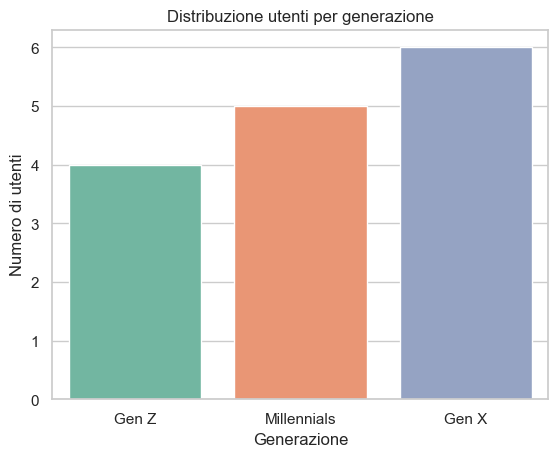

In [3]:
sns.countplot(x="Generation", hue="Generation", data=df, palette="Set2", legend=False)
plt.title("Distribuzione utenti per generazione")
plt.xlabel("Generazione")
plt.ylabel("Numero di utenti")
plt.show()


## 📈 Tempo medio giornaliero sui social per generazione

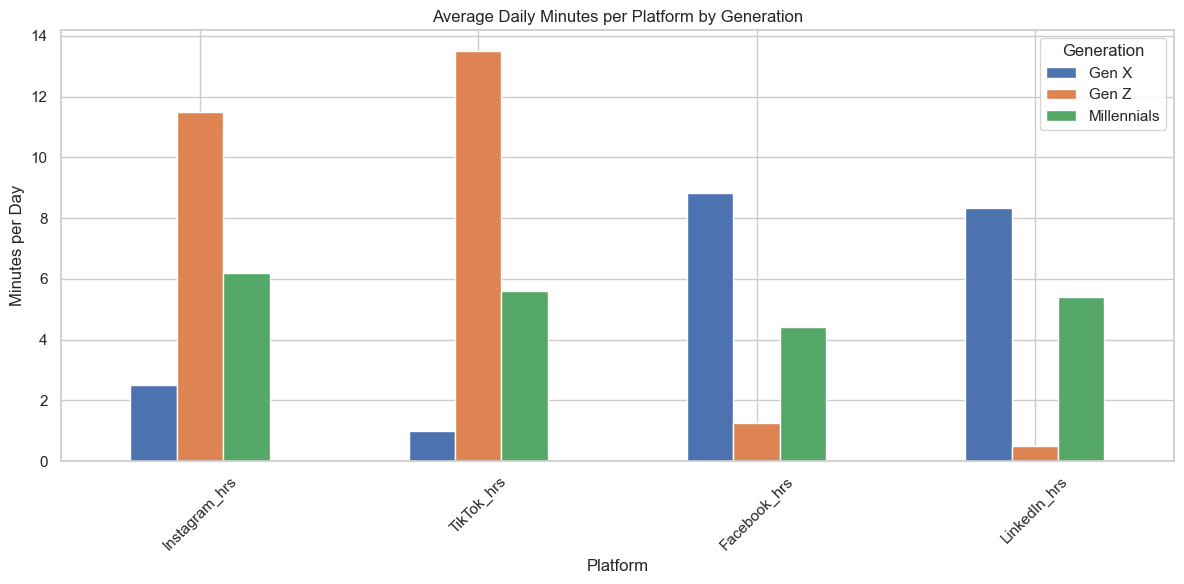

In [4]:
media = df.groupby("Generation")[['Instagram_hrs', 'TikTok_hrs', 'Facebook_hrs', 'LinkedIn_hrs']].mean()
media.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Daily Minutes per Platform by Generation")
plt.ylabel("Minutes per Day")
plt.xlabel("Platform")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🤖 Clustering utenti tramite PCA + KMeans

In [5]:
features = ['Instagram_hrs', 'TikTok_hrs', 'Facebook_hrs', 'LinkedIn_hrs']
X = df[features]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)


## 🔍 Visualizzazione dei cluster

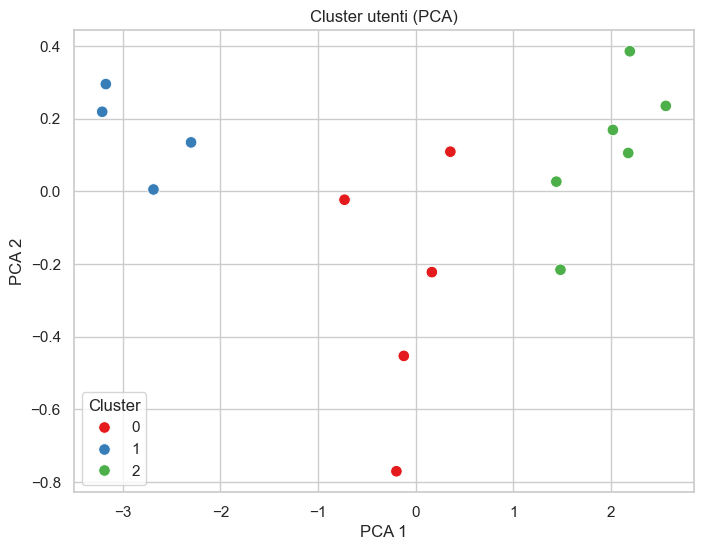

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="Set1", s=70)
plt.title("Cluster utenti (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

## ✅ Conclusioni
- Gen Z è mediamente più attiva su TikTok e Snapchat.
- Gen X tende a usare maggiormente Facebook e LinkedIn.
- I cluster rivelano tre profili distinti di comportamento digitale:
  - Social-addicted
  - Equilibrati
  - Tradizionali